In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

## Importing Dataset

In [2]:
dataset = pd.read_csv("D:\\data_for_ml\\Credit_score_classification\\train.csv")
dataset.T

C:\Users\vicky\AppData\Local\Temp\ipykernel_15708\3376895159.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("D:\\data_for_ml\\Credit_score_classification\\train.csv")


,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
ID,0x1602,0x1603,0x1604,0x1605,0x1606,0x1607,0x1608,0x1609,0x160e,0x160f,...,0x25fe0,0x25fe1,0x25fe6,0x25fe7,0x25fe8,0x25fe9,0x25fea,0x25feb,0x25fec,0x25fed
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0x21b1,CUS_0x21b1,...,CUS_0x8600,CUS_0x8600,CUS_0x942c,CUS_0x942c,CUS_0x942c,CUS_0x942c,CUS_0x942c,CUS_0x942c,CUS_0x942c,CUS_0x942c
Month,January,February,March,April,May,June,July,August,January,February,...,July,August,January,February,March,April,May,June,July,August
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,NaN,Rick Rothackerj,Rick Rothackerj,...,Sarah McBridec,Sarah McBridec,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks,Nicks
Age,23,23,-500,23,23,23,23,23,28_,28,...,28,29,24,25,25,25,25,25,25,25
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265,#F%$D@*&8,004-07-5839,004-07-5839,...,031-35-0942,031-35-0942,078-73-5990,078-73-5990,078-73-5990,078-73-5990,078-73-5990,078-73-5990,078-73-5990,078-73-5990
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,_______,Teacher,...,Architect,Architect,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic,Mechanic
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,34847.84,34847.84,...,20002.88,20002.88,39628.99,39628.99_,39628.99,39628.99,39628.99,39628.99,39628.99,39628.99_
Monthly_Inhand_Salary,1824.843333,NaN,NaN,NaN,1824.843333,NaN,1824.843333,1824.843333,3037.986667,3037.986667,...,1929.906667,1929.906667,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833,3359.415833
Num_Bank_Accounts,3,3,3,3,3,3,3,3,2,2,...,10,10,4,4,4,4,4,4,4,4


In [3]:
dataset.Credit_Score.value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

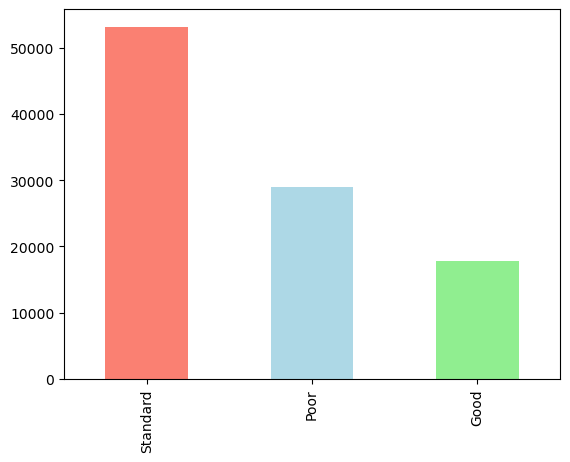

In [4]:
dataset["Credit_Score"].value_counts().plot(kind="bar", color=["salmon","lightblue", "lightgreen"]);

## Balancing `credit_score` column

In [5]:
from sklearn.utils import resample

majority_class = dataset[dataset["Credit_Score"] == "Standard"]
minority_class1 = dataset[dataset["Credit_Score"] == "Poor"]
minority_class2 = dataset[dataset["Credit_Score"] == "Good"]

minority_class1_upsampled = resample(minority_class1, replace=True, n_samples=len(majority_class), random_state=42)
minority_class2_upsampled = resample(minority_class2, replace=True, n_samples=len(majority_class), random_state=42)

dataset = pd.concat([majority_class, minority_class1_upsampled, minority_class2_upsampled])
len(dataset)

159522

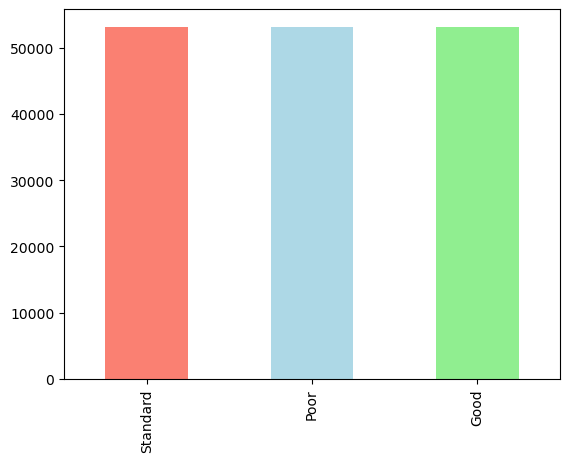

In [6]:
dataset["Credit_Score"].value_counts().plot(kind="bar", color=["salmon","lightblue", "lightgreen"]);

In [7]:
round(dataset.isna().sum()/len(dataset)*100,2)

ID                           0.00
Customer_ID                  0.00
Month                        0.00
Name                        10.00
Age                          0.00
SSN                          0.00
Occupation                   0.00
Annual_Income                0.00
Monthly_Inhand_Salary       14.97
Num_Bank_Accounts            0.00
Num_Credit_Card              0.00
Interest_Rate                0.00
Num_of_Loan                  0.00
Type_of_Loan                12.15
Delay_from_due_date          0.00
Num_of_Delayed_Payment       6.96
Changed_Credit_Limit         0.00
Num_Credit_Inquiries         1.97
Credit_Mix                   0.00
Outstanding_Debt             0.00
Credit_Utilization_Ratio     0.00
Credit_History_Age           8.92
Payment_of_Min_Amount        0.00
Total_EMI_per_month          0.00
Amount_invested_monthly      4.55
Payment_Behaviour            0.00
Monthly_Balance              1.24
Credit_Score                 0.00
dtype: float64

`Function to fill null values`

In [8]:
def fill_null_values(dataset):
    
    dataset['Monthly_Balance'] = pd.to_numeric(dataset['Monthly_Balance'], errors='coerce')
    average_value = dataset["Monthly_Balance"].mean()
    dataset['Monthly_Balance'].fillna(average_value, inplace=True)
    
    dataset['Amount_invested_monthly'] = pd.to_numeric(dataset['Amount_invested_monthly'], errors='coerce')
    average_value = dataset["Amount_invested_monthly"].mean()
    dataset['Amount_invested_monthly'].fillna(average_value, inplace=True)
    
    median_value = dataset["Num_Credit_Inquiries"].median()
    dataset["Num_Credit_Inquiries"].fillna(median_value, inplace=True)
    
    dataset['Num_of_Delayed_Payment'] = pd.to_numeric(dataset['Num_of_Delayed_Payment'], errors='coerce')
    average_value = round(dataset["Num_of_Delayed_Payment"].mean())
    dataset['Num_of_Delayed_Payment'].fillna(average_value, inplace=True)
    
    average_value = dataset["Monthly_Inhand_Salary"].mean()
    dataset['Monthly_Inhand_Salary'].fillna(average_value, inplace=True)
    
    dataset["Type_of_Loan"].fillna("Not Specified", inplace=True)
    
    return dataset

## Split `X` and `Y`

In [9]:
x = dataset.drop(dataset[["ID", "Customer_ID", "Name", "SSN", "Credit_Score", "Credit_History_Age"]], axis=1)
y = dataset["Credit_Score"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

### Fill Null Values

In [11]:
x_train = fill_null_values(x_train)
x_test = fill_null_values(x_test)

In [12]:
len(x_train), len(y_train), len(x_test), len(y_test)

(127617, 127617, 31905, 31905)

### Replacing `string into numbers`

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x_train["Month"] = label_encoder.fit_transform(x_train["Month"])
x_test["Month"] = label_encoder.transform(x_test["Month"])

x_train["Occupation"] = label_encoder.fit_transform(x_train["Occupation"])
x_test["Occupation"] = label_encoder.transform(x_test["Occupation"])

x_train["Payment_Behaviour"] = label_encoder.fit_transform(x_train["Payment_Behaviour"])
x_test["Payment_Behaviour"] = label_encoder.transform(x_test["Payment_Behaviour"])

x_train["Payment_of_Min_Amount"] = label_encoder.fit_transform(x_train["Payment_of_Min_Amount"])
x_test["Payment_of_Min_Amount"] = label_encoder.transform(x_test["Payment_of_Min_Amount"])

x_train["Type_of_Loan"] = label_encoder.fit_transform(x_train["Type_of_Loan"])
x_test["Type_of_Loan"] = label_encoder.transform(x_test["Type_of_Loan"])

x_train["Credit_Mix"] = label_encoder.fit_transform(x_train["Credit_Mix"]) 
x_test["Credit_Mix"] = label_encoder.transform(x_test["Credit_Mix"])  

x_train["Payment_Behaviour"] = label_encoder.fit_transform(x_train["Payment_Behaviour"])        
x_test["Payment_Behaviour"] = label_encoder.transform(x_test["Payment_Behaviour"])

y_train = y_train.replace({'Standard': 1, "Poor": 0, "Good": 2})
y_test = y_test.replace({'Standard': 1, "Poor": 0, "Good": 2})

In [14]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127617 entries, 94971 to 52694
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     127617 non-null  int32  
 1   Age                       127617 non-null  object 
 2   Occupation                127617 non-null  int32  
 3   Annual_Income             127617 non-null  object 
 4   Monthly_Inhand_Salary     127617 non-null  float64
 5   Num_Bank_Accounts         127617 non-null  int64  
 6   Num_Credit_Card           127617 non-null  int64  
 7   Interest_Rate             127617 non-null  int64  
 8   Num_of_Loan               127617 non-null  object 
 9   Type_of_Loan              127617 non-null  int32  
 10  Delay_from_due_date       127617 non-null  int64  
 11  Num_of_Delayed_Payment    127617 non-null  float64
 12  Changed_Credit_Limit      127617 non-null  object 
 13  Num_Credit_Inquiries      127617 non-null

In [15]:
x_train['Age'] = x_train['Age'].str.replace(r'\D+(\d+)_?', r'\1', regex=True)
x_train['Age'] = x_train['Age'].replace({'_': ''}, regex=True)
x_train['Age'] = pd.to_numeric(x_train['Age'], errors='coerce', downcast='integer').fillna(-1)
x_train['Age'] = np.where(x_train['Age'] != -1, x_train['Age'] / 100, x_train['Age'])

x_test['Age'] = x_test['Age'].str.replace(r'\D+(\d+)_?', r'\1', regex=True)
x_test['Age'] = x_test['Age'].replace({'_': ''}, regex=True)
x_test['Age'] = pd.to_numeric(x_test['Age'], errors='coerce', downcast='integer').fillna(-1)
x_test['Age'] = np.where(x_test['Age'] != -1, x_test['Age'] / 100, x_test['Age'])

In [16]:
columns_to_convert = ["Annual_Income", "Num_of_Loan", "Changed_Credit_Limit", "Outstanding_Debt"]

for column in columns_to_convert:
    x_train[column] = pd.to_numeric(x_train[column], errors='coerce', downcast='integer').fillna(-1)
    x_test[column] = pd.to_numeric(x_test[column], errors='coerce', downcast='integer').fillna(-1)

In [17]:
x_train.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

## `Correlation matrix`

In [18]:
matrix_dataset = pd.concat([x_train, y_train], axis=1)
matrix_dataset

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
94971,0,0.41,3,19627.140,1871.595000,4,7,11,7.0,2619,...,5.0,2,402.54,28.568959,2,87.233399,200.770837,6,189.155264,1
45957,5,5.00,4,33287.120,2844.926667,7,5,9,2.0,3461,...,6.0,3,1137.16,25.744253,1,45.785840,97.362108,4,411.344719,1
41421,5,0.39,13,7314.675,319.556250,10,7,29,7.0,4905,...,5.0,0,2169.86,37.407062,2,25.159330,35.320607,6,261.475687,1
78601,2,0.44,8,-1.000,2701.425000,1,7,1,2.0,4140,...,3.0,1,857.99,33.380446,1,54.212824,52.488909,1,403.440767,1
43174,4,0.30,5,16752.690,1666.057500,8,6,26,6.0,5787,...,13.0,0,2410.07,29.855162,2,73.699897,134.549924,6,248.355929,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51364,7,79.12,10,33235.400,4336.499865,6,5,17,0.0,3463,...,5.0,2,1056.33,32.763747,1,0.000000,60.817015,0,440.244652,2
26808,3,0.31,0,107157.120,9178.760000,8,6,9,0.0,3463,...,2.0,3,182.91,36.790321,1,0.000000,368.044505,5,829.831495,0
42050,6,0.32,0,30348.010,2572.000833,1,6,3761,3.0,6022,...,0.0,1,645.25,35.273969,1,67.817424,315.931012,6,163.451647,2
74033,2,0.46,11,30696.330,2617.027500,2,3,8,2.0,2778,...,0.0,1,1428.84,22.867009,1,36329.000000,288.300397,6,235.954199,2


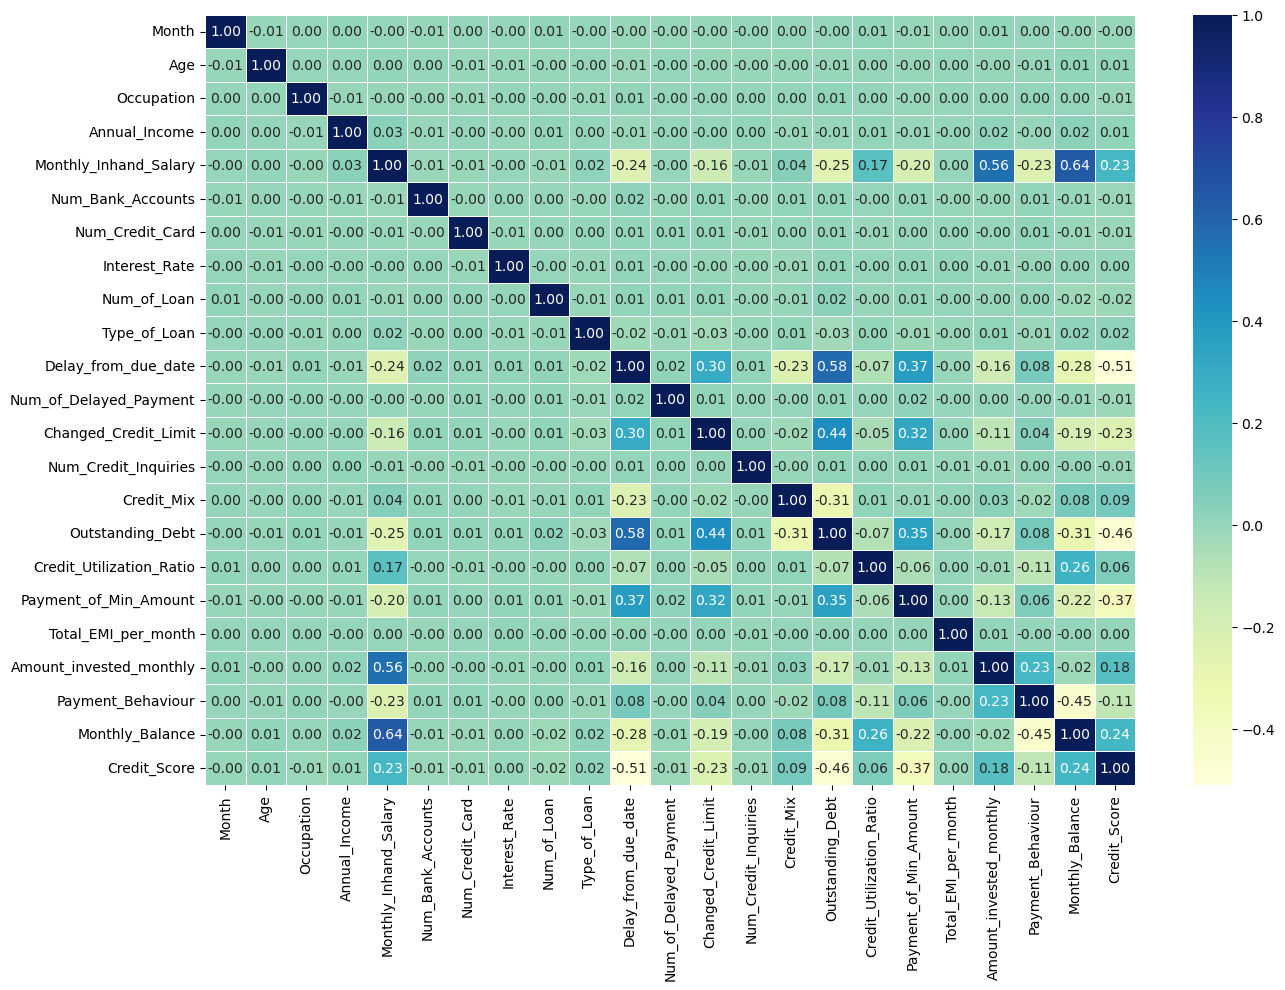

In [19]:
import seaborn as sns

corr_matrix = matrix_dataset.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="YlGnBu");

In [20]:
x_train = x_train[['Monthly_Balance', 'Amount_invested_monthly', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix',
       'Outstanding_Debt', 'Changed_Credit_Limit', 'Delay_from_due_date', 'Monthly_Inhand_Salary']]

x_test = x_test[['Monthly_Balance', 'Amount_invested_monthly', 'Payment_Behaviour', 'Payment_of_Min_Amount', 'Credit_Mix',
       'Outstanding_Debt', 'Changed_Credit_Limit', 'Delay_from_due_date', 'Monthly_Inhand_Salary']]

## Feature Scalling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train = pd.DataFrame(x_train_scaled)
x_test = pd.DataFrame(x_test_scaled)

In [22]:
x_train

,0,1,2,3,4,5,6,7,8
0,-1.006895,-0.013836,1.256854,0.965074,0.479206,-0.862268,-0.253885,-0.076310,-0.811505
1,0.005998,-0.525101,0.274156,-0.502582,1.470659,-0.209260,0.161682,0.188362,-0.491061
2,-0.677208,-0.831841,1.256854,0.965074,-1.503700,0.708714,-0.392900,2.438073,-1.322473
3,-0.030033,-0.746959,-1.199891,-0.502582,-0.512247,-0.457416,0.272598,-1.465838,-0.538305
4,-0.737017,-0.341240,1.256854,0.965074,-1.503700,0.922238,-0.394379,0.850042,-0.879173
...,...,...,...,...,...,...,...,...,...
127612,0.137744,-0.705784,-1.691240,-0.502582,0.479206,-0.281110,-0.916425,0.519202,0.000000
127613,1.913751,0.813184,0.765505,-0.502582,1.470659,-1.057499,-0.539309,0.188362,1.594187
127614,-1.124070,0.555529,1.256854,-0.502582,-0.512247,-0.646522,-0.987411,-0.870326,-0.580915
127615,-0.793553,0.418920,1.256854,-0.502582,-0.512247,0.050016,-0.265716,-0.804158,-0.566091


In [23]:
x_test

,0,1,2,3,4,5,6,7,8
0,0.165825,-0.005296,-1.691240,-1.970239,-0.512247,-0.122707,-1.803756,-0.605654,-0.451020
1,0.478097,-0.028590,1.256854,0.965074,0.479206,1.032835,1.071196,1.445553,0.146296
2,-0.547239,-0.202687,1.256854,-0.502582,-0.512247,-0.021754,-0.407689,-0.473318,-0.892493
3,-0.541961,-0.005296,-0.708542,0.965074,-1.503700,0.244553,-0.110433,1.776393,-0.446736
4,0.679568,-0.504545,-1.691240,0.965074,-1.503700,2.474739,1.318170,0.453034,0.745683
...,...,...,...,...,...,...,...,...,...
31900,1.751114,0.037102,-1.199891,-0.502582,-0.512247,-0.288257,-1.102764,-1.134998,2.221869
31901,0.037307,1.440616,0.765505,-0.502582,1.470659,-0.511737,-0.625085,-0.539486,-0.007784
31902,0.144067,-0.701773,-0.217193,-0.502582,1.470659,-0.373592,-0.679803,-0.142478,-0.576950
31903,-0.003173,8.342141,1.256854,-0.502582,-0.512247,-1.004431,-0.222828,-1.267334,3.304298


## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

dc = DecisionTreeClassifier(random_state=42)
dc.fit(x_train, y_train)
y_preds_dc = dc.predict(x_test)
accuracy = accuracy_score(y_test, y_preds_dc)*100
print(f'Accuracy: {accuracy}')

Accuracy: 84.65444287729196


In [27]:
report = classification_report(y_test, y_preds_dc)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     10671
           1       0.85      0.68      0.75     10449
           2       0.87      0.95      0.91     10785

    accuracy                           0.85     31905
   macro avg       0.85      0.84      0.84     31905
weighted avg       0.85      0.85      0.84     31905



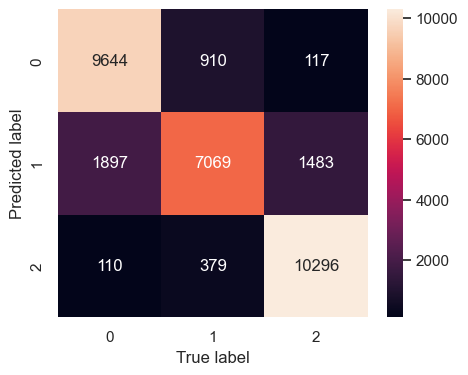

In [28]:
sns.set(font_scale=1.0)

def plot_conf_mat(y_test, y_preds):

    fig, ax = plt.subplots(figsize=(5, 4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     fmt="d")
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,y_preds_dc)

## RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=350, random_state=42)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8739382541921329

In [30]:
y_preds_clf = clf.predict(x_test)
y_preds_clf

array([2, 0, 1, ..., 2, 2, 1], dtype=int64)

In [31]:
report = classification_report(y_test, y_preds_clf)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     10671
           1       0.91      0.70      0.79     10449
           2       0.85      0.98      0.91     10785

    accuracy                           0.87     31905
   macro avg       0.88      0.87      0.87     31905
weighted avg       0.88      0.87      0.87     31905



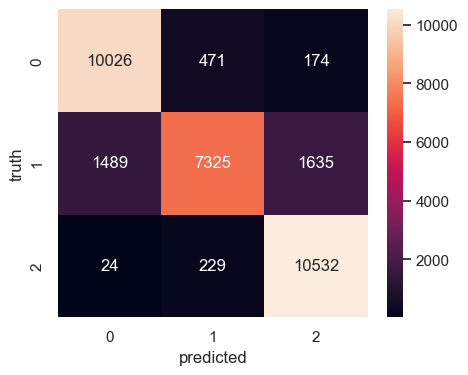

In [32]:
import tensorflow as tf

cm = tf.math.confusion_matrix(predictions=y_preds_clf, labels=y_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("truth");

## XGBClassifier

In [34]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 42, n_estimators= 2000)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_xgb)*100
print(f'Accuracy: {accuracy}')

Accuracy: 88.74784516533458


In [36]:
report = classification_report(y_test, y_pred_xgb)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     10671
           1       0.90      0.75      0.82     10449
           2       0.89      0.97      0.93     10785

    accuracy                           0.89     31905
   macro avg       0.89      0.89      0.88     31905
weighted avg       0.89      0.89      0.88     31905



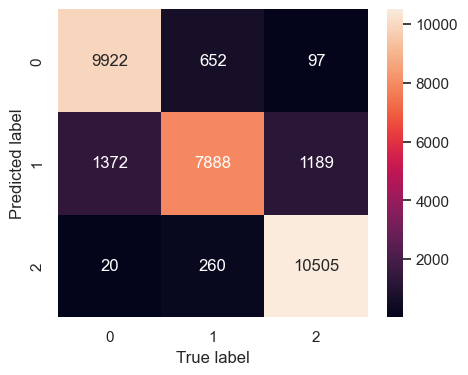

In [38]:
sns.set(font_scale=1.0)

def plot_conf_mat(y_test, y_preds):

    fig, ax = plt.subplots(figsize=(5, 4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     fmt="d")
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,y_pred_xgb)

In [39]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(base_estimator = DecisionTreeClassifier(criterion='entropy'),
                                 n_estimators = 100,
                                 oob_score = True,
                                 max_samples = 0.8,
                                 random_state=42)

bag_model.fit(x_train,y_train)
bag_model.oob_score_

C:\Users\vicky\desktop\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8695941763244709

# Accuracy Score

In [40]:
print(f"DecisionTree: {accuracy_score(y_test, y_preds_dc)*100:.2f}%")
print(f"XGBoost: {accuracy_score(y_test, y_pred_xgb)*100:.2f}%")
print(f"RandomForestClassifier: {accuracy_score(y_test, y_preds_clf)*100:.2f}%")

DecisionTree: 84.65%
XGBoost: 88.75%
RandomForestClassifier: 87.39%
